# Decision Trees - kyphosis <a name=top></a>
In this notebook, you will explore the `kyphosis` dataset with various decision tree methods (`rpart`,`ctree`).

#### TUTORIAL OUTLINE

1. [Examining the Data](#kyphosis_data)
2. [Growing the Tree](#kyphosis_rpart)
2. [Examining the Results](#kyphosis_tree)
3. [Pruning the Tree](#kyphosis_prune)
4. [Confusion Matrix](#kyphosis_confusion)
5. [Training/Testing](#training_testing)
5. [Conditional Inference Tree](#ctree)
4. [Exercises](#exer)


---
[Back to top](#top)
## 1. EXAMINING THE DATA <a name=kyphosis_data></a>

Start by initializing the environment. 

In [1]:
library(rpart) # Classification Tree with rpart
library(psych) # to be able to use "describe"
library(party) # Conditional inference tree (later)
library(rattle) # Will be used when plotting the decision tree
library(rpart.plot) # ditto

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
R session is headless; GTK+ not initialized.
Rattle: A free graphical interface for data science with R.
Version 5.1.0 Copyright (c) 2006-2017 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Now let's get some information on the kyphosis dataset (which is built-in).

In [2]:
?kyphosis # calls-up the help file on the dataset

str(kyphosis) # provides the dataset structure
head(kyphosis) # shows the first 6 entries
summary(kyphosis) # provides a summary (quantiles statistics for each of the variables)
describe(kyphosis) # provides other statistics for each of the variables

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


Kyphosis,Age,Number,Start
absent,71,3,5
absent,158,3,14
present,128,4,5
absent,2,5,1
absent,1,4,15
absent,1,2,16


    Kyphosis       Age             Number           Start      
 absent :64   Min.   :  1.00   Min.   : 2.000   Min.   : 1.00  
 present:17   1st Qu.: 26.00   1st Qu.: 3.000   1st Qu.: 9.00  
              Median : 87.00   Median : 4.000   Median :13.00  
              Mean   : 83.65   Mean   : 4.049   Mean   :11.49  
              3rd Qu.:130.00   3rd Qu.: 5.000   3rd Qu.:16.00  
              Max.   :206.00   Max.   :10.000   Max.   :18.00  

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Kyphosis*,1,81,1.209877,0.4097575,1,1.138462,0.0000,1,2,1,1.39859143,-0.04403023,0.04552861
Age,2,81,83.654321,58.1042512,87,82.292308,77.0952,1,206,205,0.05232221,-1.23978545,6.45602792
Number,3,81,4.049383,1.6194230,4,3.876923,1.4826,2,10,8,1.08983120,1.56814629,0.17993589
Start,4,81,11.493827,4.8839622,13,12.076923,4.4478,1,18,17,-0.85338366,-0.48859925,0.54266246


As always, we should take the time to visualize the dataset. In this case, since there are 4 variables (one of which is categorical), a scatterplot matrix is probably a good way to do this.

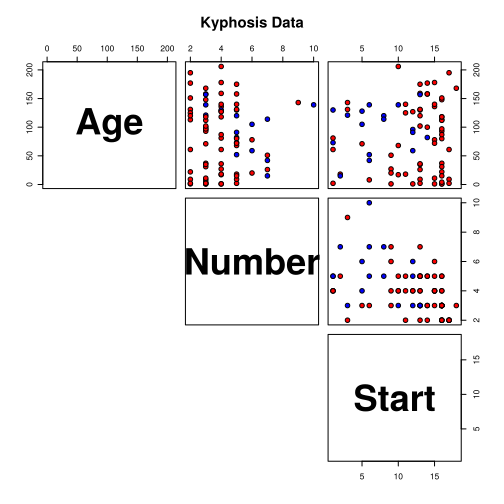

In [3]:
pairs(kyphosis[,2:4], main = "Kyphosis Data", pch = 21, bg = c("red", "blue")[unclass(kyphosis[,1])], lower.panel=NULL, labels=c("Age","Number","Start"), font.labels=2, cex.labels=4.5)

Can you guess what the legend of this scatterplot matrix should be (red=?, blue=?)?

---
[Back to top](#top)
## 2. GROWING THE TREE <a name=kyphosis_rpart></a>
We build a tree using the recursive partitioning algorithm (for the time being, we're assuming that the dataset as a whole is the **training set**). 

In [4]:
# grow tree 
tree <- rpart(Kyphosis ~ Age + Number + Start, method="class", data=kyphosis)


Notice that no output is displayed. 

---
[Back to top](#top)
## 3. EXAMINING THE RESULTS <a name=kyphosis_tree></a>
We can get to the method results by using `printcp` (although how informative you'll find the output depends on what you were expecting in the first place...)

In [5]:
printcp(tree) # display the results 


Classification tree:
rpart(formula = Kyphosis ~ Age + Number + Start, data = kyphosis, 
    method = "class")

Variables actually used in tree construction:
[1] Age   Start

Root node error: 17/81 = 0.20988

n= 81 

        CP nsplit rel error xerror    xstd
1 0.176471      0   1.00000      1 0.21559
2 0.019608      1   0.82353      1 0.21559
3 0.010000      4   0.76471      1 0.21559


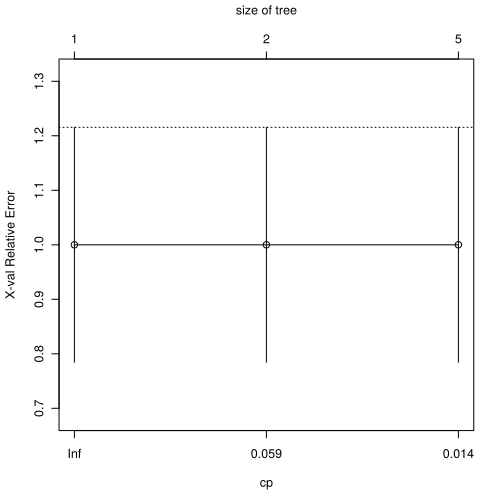

In [6]:
plotcp(tree) # visualize cross-validation results 

Node details can be seen by using the `summary` function. 

In [7]:
summary(tree) # detailed summary of splits

Call:
rpart(formula = Kyphosis ~ Age + Number + Start, data = kyphosis, 
    method = "class")
  n= 81 

          CP nsplit rel error xerror      xstd
1 0.17647059      0 1.0000000      1 0.2155872
2 0.01960784      1 0.8235294      1 0.2155872
3 0.01000000      4 0.7647059      1 0.2155872

Variable importance
 Start    Age Number 
    64     24     12 

Node number 1: 81 observations,    complexity param=0.1764706
  predicted class=absent   expected loss=0.2098765  P(node) =1
    class counts:    64    17
   probabilities: 0.790 0.210 
  left son=2 (62 obs) right son=3 (19 obs)
  Primary splits:
      Start  < 8.5  to the right, improve=6.762330, (0 missing)
      Number < 5.5  to the left,  improve=2.866795, (0 missing)
      Age    < 39.5 to the left,  improve=2.250212, (0 missing)
  Surrogate splits:
      Number < 6.5  to the left,  agree=0.802, adj=0.158, (0 split)

Node number 2: 62 observations,    complexity param=0.01960784
  predicted class=absent   expected loss=0.0967741

What are these nodes that are being referred to? Plotting the tree will provide more information.

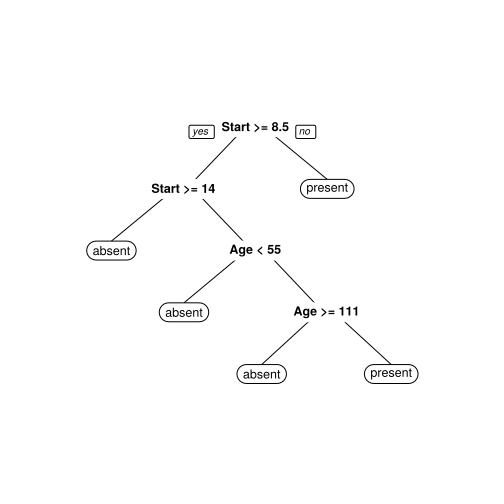

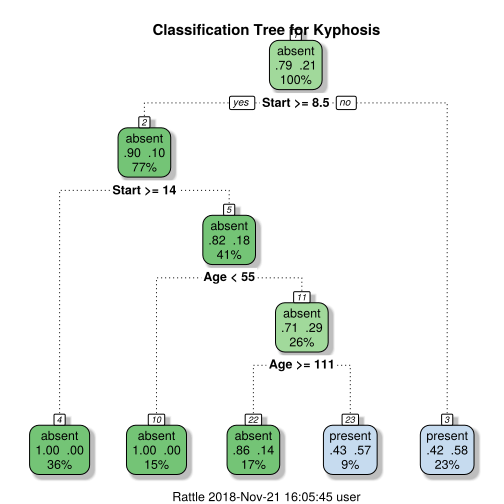

In [8]:
prp(tree) # basic plot
fancyRpartPlot(tree, main="Classification Tree for Kyphosis") # fancier plot

In the fancy plot, does the intensity of the colour play a role? What about the percentages? What about the decimals? Ask for details.

---
[Back to top](#top)
## 4. PRUNING THE TREE <a name=kyphosis_prune></a>

Unchecked tree growth leads to overfitting. This is typically a problem when a dataset contains too many variables (the corresponding decision tree will contain too many splits in that case). Overfitting is not going to be an issue in the case of the `kyphosis` dataset because it contains only three variables, nevertheless, the code below shows you how you would **prune** the growth of the tree in general. 

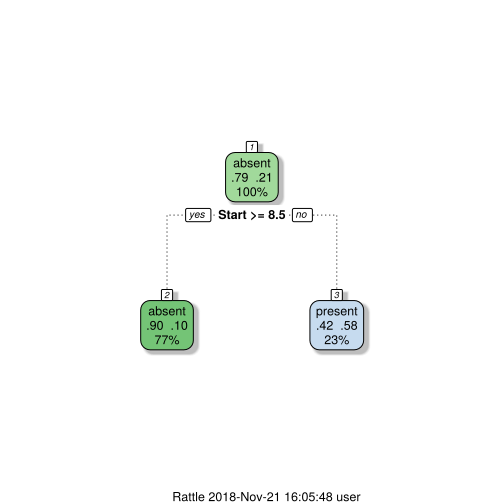

In [9]:
# prune by finding a cp which maximizes xerror
tree2 = prune(tree, cp = 0.02)
fancyRpartPlot(tree2)

---
[Back to top](#top)
## 5. CONFUSION MATRIX <a name=kyphosis_confusion></a>

How good is the classification model provided by the tree? We don't have access to $p$-values or confidence intervals -- we need to rely on the model's **confusion matrix**.

We can obtain the predictions made by the model on the object `tree` by using the `predict` function. This procedure takes each observation and feeds it to the model, outputting the likelihood of kyphosis being `absent` or `present`. Note that the probabilities are **calibrated** - compare with the Naive Bayes method which we will see later.

In [10]:
predictions1 = predict(tree, type = "prob")   # class probabilities (default)
predictions1

,absent,present
1,0.4210526,0.5789474
2,0.8571429,0.1428571
3,0.4210526,0.5789474
4,0.4210526,0.5789474
5,1.0000000,0.0000000
6,1.0000000,0.0000000
7,1.0000000,0.0000000
8,1.0000000,0.0000000
9,1.0000000,0.0000000
10,0.4285714,0.5714286


In general, the confusion matrix requires a specific prediction (`absent` or `present`), against which we can compare the actual classification. Here, we have probabilities. How can we take the probabilities and transform them into specific predictions?

Here's one way to do this. 

In [11]:
random1 <- runif(81) # uniformly generate a random number (between 0 and 1) for each of the observations 
(real <- kyphosis$Kyphosis) # extract the actual classification of the observations
test1 <- cbind(predictions1,random1,real) # join together the prediction probabilities, the random numbers, and the actual classification
                                          # since we're joining together text and numbers, cbind coerces the factors to numerical values
                                          # absent = 1, present = 2
pred1 <- 2-(test1[,3]<test1[,1])  # this code takes advantage of the numerical presentation of the factors to output a specific prediction
                                  # if random1 < prob of absent, then real = absent (1), otherwise real = present (2)
(test1 <- cbind(test1,pred1)) # add the specific predictions to the test1 dataset

[1] absent  absent  present absent  absent  absent  absent  absent  absent 
[10] present present absent  absent  absent  absent  absent  absent  absent 
[19] absent  absent  absent  present present absent  present absent  absent 
[28] absent  absent  absent  absent  absent  absent  absent  absent  absent 
[37] absent  present absent  present present absent  absent  absent  absent 
[46] present absent  absent  present absent  absent  absent  present absent 
[55] absent  absent  absent  present absent  absent  present present absent 
[64] absent  absent  absent  absent  absent  absent  absent  absent  absent 
[73] absent  absent  absent  absent  present absent  absent  present absent 
Levels: absent present

,absent,present,random1,real,pred1
1,0.4210526,0.5789474,0.0093540365,1,1
2,0.8571429,0.1428571,0.6145819523,1,1
3,0.4210526,0.5789474,0.3642072745,2,1
4,0.4210526,0.5789474,0.1206397603,1,1
5,1.0000000,0.0000000,0.6668125172,1,1
6,1.0000000,0.0000000,0.5942674377,1,1
7,1.0000000,0.0000000,0.4724154142,1,1
8,1.0000000,0.0000000,0.1881813726,1,1
9,1.0000000,0.0000000,0.9504777282,1,1
10,0.4285714,0.5714286,0.4057751808,2,1


We can now build the Confusion Matrix on the model predictions using real (actual classification) and pred1 (specific model prediction). 

In [12]:
(object1 <- table(test1[,4],test1[,5])) # the function table produces a joint distribution 
                                        # rows = first variable (real), columns = second variable (predicted)

   
     1  2
  1 58  6
  2  9  8

You may get a different confusion matrix for each specific prediction you produce (why?).

In the final analysis, is this a good classification model, or not? 

---
[Back to top](#top)
## 6. TRAINING/TESTING <a name=training_testing></a>

In the previous example, we computed the confusion matrix using the entire dataset. In a sense, we shouldn't have been surprised that the results were decent, because we're using the same data to build the model and to evaluate it. 

Ideally, classification models are built on a subset of the data (called the **training set**) and evaluated on the remaining data (called the **testing set**). 

The idea is that if there IS a strong classification signal, it should be found in any representative subset. As a rule, we look for training sets making up between 70% and 80% of the data. They should be selected randomly. 

In [13]:
sub <- c(sample(1:81, 50)) # create a training set with 50 instances
fit <- rpart(Kyphosis ~ ., data = kyphosis, subset = sub) # If we use all variables, we don't need 
                                                          # to specify them (as above), we just use the "."
fit # what does the model look like? 

n= 50 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 50 9 absent (0.8200000 0.1800000)  
  2) Start>=12.5 28 0 absent (1.0000000 0.0000000) *
  3) Start< 12.5 22 9 absent (0.5909091 0.4090909)  
    6) Age< 51.5 7 1 absent (0.8571429 0.1428571) *
    7) Age>=51.5 15 7 present (0.4666667 0.5333333) *

The confusion matrix has to be built on the testing set (indicated here by -sub, that is, the opposite of the sub indices).

There are 2 ways to make a prediction: we either use the most likely outcome, or we generate a random vector of predictions using the probabilities for each class, as above.

In [14]:
# predict on class
table(predict(fit, kyphosis[-sub,], type = "class"), kyphosis[-sub, "Kyphosis"]) 

         
          absent present
  absent      20       3
  present      3       5

In [15]:
# predicting on probability
prob.fit<-predict(fit, kyphosis[-sub,], type = "prob")
random1 <- runif(31)
real <- kyphosis[-sub,"Kyphosis"]
test1 <- cbind(prob.fit,random1,real) # absent = 1, present = 2
pred1 <- 2-(test1[,3]<test1[,1])
test1 <- cbind(test1,pred1)

table(test1[,4], test1[,5])

   
     1  2
  1 22  1
  2  5  3

---
[Back to top](#top)
## 7. CONDITIONAL INFERENCE TREES <a name=ctree></a>
Another way to build trees is with the `party` library. Conditional inference trees have the property that they will automatically prune themselves once a statistical criterion is met by the tree as a whole. The downside is that it doesn't usually pick fully rationalizable splits. 


	 Conditional inference tree with 2 terminal nodes

Response:  Kyphosis 
Inputs:  Age, Number, Start 
Number of observations:  50 

1) Start <= 12; criterion = 0.986, statistic = 8.047
  2)*  weights = 22 
1) Start > 12
  3)*  weights = 28 

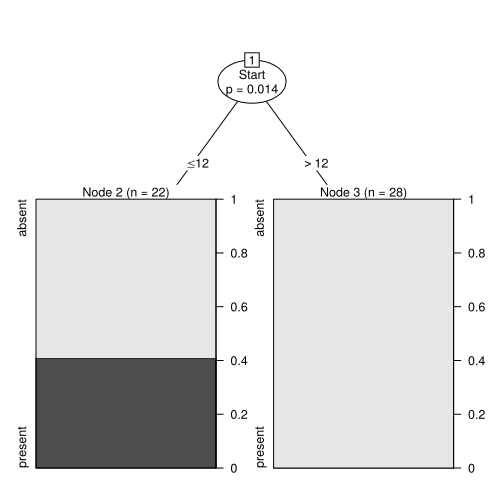

In [16]:
kyphosis.ctree <- ctree(Kyphosis ~ ., data = kyphosis, subset = sub)
kyphosis.ctree

plot(kyphosis.ctree)

In [17]:
table(predict(kyphosis.ctree, kyphosis[-sub,]),kyphosis[-sub,1]) # which method is used to generate 
                                                                 # a specific prediction on the testing set

         
          absent present
  absent      23       8
  present      0       0

How do you feel about the quality of the model prediction?

---
[Back to top](#top)
## 8. EXERCISES <a name=exer></a>
- If you wanted to build an `rpart` tree using only 2 of the features (say, `Age` and `Number`), you would replace the first option by `Kyphosis ~ Age + Number`. Build the tree `tree.simplified` and compare the results of the subsequent analysis.
- create `rpart` and `ctree` decision trees for the iris dataset.  Some pointers are provided below.

In [18]:
# Create a training set with 35 observations for each species
# sub <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35))

In [19]:
# with rpart
#iris.rpart <- rpart(Species ~ ., data = iris, subset = sub)
#iris.rpart
#table(predict(iris.rpart, iris[-sub,], type = "class"), iris[-sub, "Species"])
#fancyRpartPlot(iris.rpart, main="Classification Tree for Iris")


In [20]:
# with ctree
#library(party)
#iris.ctree <- ctree(Species ~ ., data = iris, subset = sub)
#iris.ctree

#plot(iris.ctree)
#table(predict(iris.ctree, iris[-sub,]),iris[-sub,5])